# FCMG 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = os.chdir('/Users/nguyenthientoan/Data_Analyst_Project/dataset')

In [4]:
os.getcwd()

'/Users/nguyenthientoan/Data_Analyst_Project/dataset'

In [5]:
df = pd.read_csv('FMCG_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

# Question 

1. Demand (product_wg_ton) tập trung ở các phân khúc như thế nào? (region/zone, location type, owner type,Flood Affect, Size, Certificated). So sánh/ cho thấy pattern giữa các phân khúc.

2. Supply (# Ware_house_ID) tập trung ở các phân khúc như thế nào? (region/zone, location type, owner type,Flood Affect, Size, Certificated). So sánh/ cho thấy pattern giữa các phân khúc.

3. Phân loại warehouse theo số năm thành lập, mỗi năm có bao nhiêu warehouse mới. Sản lượng của các warehouse thay đổi thế nào dựa trên số năm thành lập

4. Về quản lý warehouse, các chỉ số transport_issue_l1y, wh_breakdown_l3m,num_refill_req_l3m, storage_issue_reported_l3m thay đổi thế nào giữa các warehouse có số năm thành lập giống nhau

# Cleaning

#### Missing 
    *** Total row: 25000
        - workers_num: 24010
        - wh_est_year: 13119
        - approved_wh_govt_certificate: 24092
    =>> Đây là bài tập về phân tích nên tạm thời tôi sẽ dùng phương pháp `dropna()`... tập trung phân tích

#### Duplication
    Khong co 0 duplication
#### Datatype validation
    
    - workers_num: float -> int64
    - wh_est_year: float -> int64
#### Convert categorical variables
    *** Method: using one-hot encoding or label encoding
    - Location_type
    - zone
    - WH_regional_zone
    - wh_owner_type
    
#### Normalize or scale numerical features

In [7]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [8]:
df.dtypes

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

# EDA

In [9]:


# Unique values in the "WH_capacity_size" column
unique_capacity_sizes = df['WH_capacity_size'].unique()

# Unique values in the "flood_impacted" column
unique_flood_impacted = df['flood_impacted'].unique()


In [10]:
unique_capacity_sizes

array(['Small', 'Large', 'Mid'], dtype=object)

In [11]:
unique_flood_impacted

array([0, 1])

In [12]:
L0 = df[(df['WH_capacity_size'] =='Large') & (df['flood_impacted'] == 0) ]
L0.shape

(9192, 24)

In [13]:
M0 = df[(df['WH_capacity_size'] =='Mid') & (df['flood_impacted'] == 0) ]
M0.shape

(9040, 24)

In [14]:
S0 = df[(df['WH_capacity_size'] =='Small') & (df['flood_impacted'] == 0) ]
S0.shape

(4314, 24)

In [15]:
L1 = df[(df['WH_capacity_size'] =='Large') & (df['flood_impacted'] == 1) ].shape
L1

(977, 24)

In [16]:
M1 = df[(df['WH_capacity_size'] =='Mid') & (df['flood_impacted'] == 1) ].shape
M1

(980, 24)

In [17]:
S1 = df[(df['WH_capacity_size'] =='Mid') & (df['flood_impacted'] == 1) ].shape
S1

(980, 24)

In [18]:
L0.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,0,0,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,Rented,45,0,0,0,241,23.0,NaN,18,0,C,6,24,24093
10,WH_100010,EID_50010,Rural,Large,North,Zone 6,7,1,3,4623,Company Owned,31,0,0,1,150,37.0,1999.0,17,0,B+,4,6,21125
11,WH_100011,EID_50011,Rural,Large,North,Zone 6,7,0,5,4627,Rented,40,0,0,0,225,16.0,2017.0,11,0,B,2,28,14115


In [19]:
L0['product_wg_ton'].sum()

203405853

L0: có 9192 wh với năng suất 203,405,853 (40.76% wh với 40.80%)
M0: có 9040 wh với năng suất 200,322,825 (40.09% wh với 40.18%)
S0: có 4314 wh với năng suất 94,795,774  (19.13% wh với 19.10%)

In [20]:
M0['product_wg_ton'].sum()

200322825

In [21]:
S0['product_wg_ton'].sum()

94795774

In [22]:
4314 /(9192 + 9040 + 4314)

0.19134214494810609

In [23]:
94795774 / (203405853 +200322825 + 94795774)

0.19015270689270022

L0 và M0 có sự ngang bằng. Vậy có nên duy trì wh Large không vì Large sẽ tốn chi phí duy trì hơn trong khi số lương ship bằng nhau

In [24]:
#drop NA
df = df.dropna()

In [25]:
# Tạo các nhóm dựa trên region/zone
by_region_zone = df.groupby(['zone', 'WH_regional_zone'])['product_wg_ton'].sum()

# Tạo các nhóm dựa trên location type
by_location_type = df.groupby('Location_type')['product_wg_ton'].sum()

# Tạo các nhóm dựa trên owner type
by_owner_type = df.groupby('wh_owner_type')['product_wg_ton'].sum()

# Tạo các nhóm dựa trên Flood Affect
by_flood_affect = df.groupby('flood_impacted')['product_wg_ton'].sum()

# Tạo các nhóm dựa trên Size
by_size = df.groupby('WH_capacity_size')['product_wg_ton'].sum()

# Tạo các nhóm dựa trên Certificated
by_certificated = df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum()

In [26]:
by_region_zone

zone   WH_regional_zone
East   Zone 1                380564
       Zone 3               1381595
       Zone 4               1899435
       Zone 5                882624
       Zone 6                749329
North  Zone 1               9913534
       Zone 2               9648994
       Zone 3              11275610
       Zone 4              14524822
       Zone 5              23017638
       Zone 6              54006429
South  Zone 1               7255973
       Zone 2              17461051
       Zone 3               9564808
       Zone 4              10041240
       Zone 5              12576097
       Zone 6              15930646
West   Zone 1               5755848
       Zone 2               8851601
       Zone 3              11805659
       Zone 4              24367078
       Zone 5              17598922
       Zone 6              29029703
Name: product_wg_ton, dtype: int64

In [27]:
by_location_type

Location_type
Rural    268856572
Urban     29062628
Name: product_wg_ton, dtype: int64

In [28]:
by_owner_type

wh_owner_type
Company Owned    161697924
Rented           136221276
Name: product_wg_ton, dtype: int64

In [29]:
by_flood_affect

flood_impacted
0    270834667
1     27084533
Name: product_wg_ton, dtype: int64

In [30]:
by_size

WH_capacity_size
Large    121999335
Mid      120821893
Small     55097972
Name: product_wg_ton, dtype: int64

In [31]:
by_certificated

approved_wh_govt_certificate
A     61351328
A+    61840454
B     56611106
B+    56901207
C     61215105
Name: product_wg_ton, dtype: int64

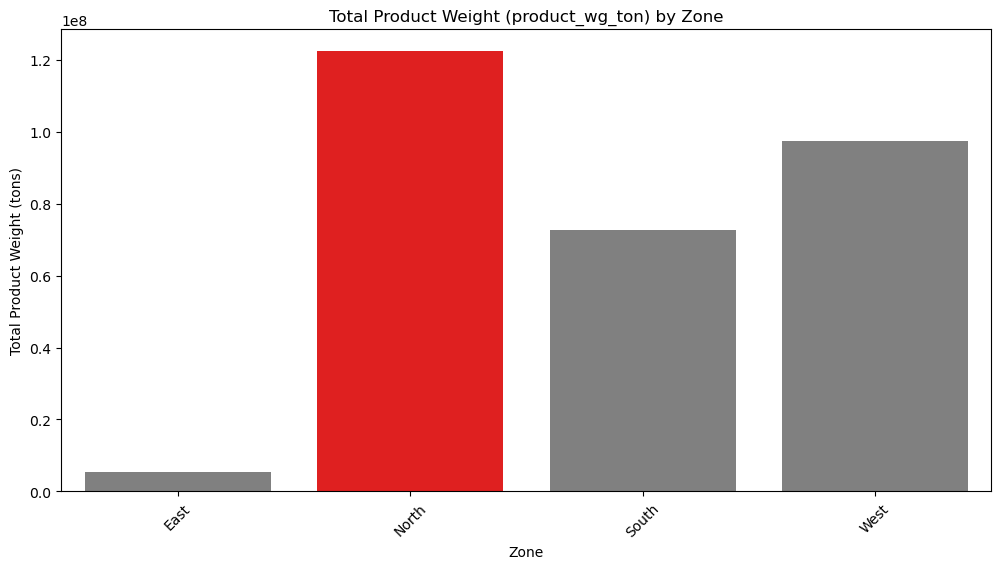

In [32]:
# Calculate the sum of product_wg_ton for each zone
zone_totals = df.groupby('zone')['product_wg_ton'].sum().reset_index()

# Find the zone with the highest sum of product_wg_ton
max_total_zone = zone_totals.loc[zone_totals['product_wg_ton'].idxmax(), 'zone']

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if zone == max_total_zone else 'grey' for zone in zone_totals['zone']]

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y='product_wg_ton', data=zone_totals, palette=colors)
plt.title('Total Product Weight (product_wg_ton) by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Product Weight (tons)')
plt.xticks(rotation=45)
plt.show()


In [33]:
df.columns.T

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

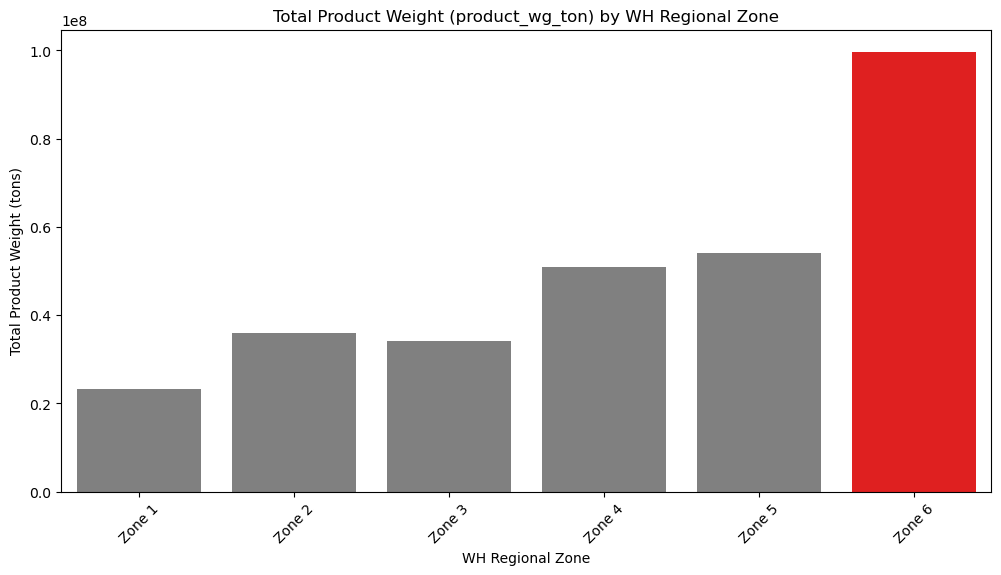

In [34]:
# Calculate the sum of product_wg_ton for each WH_regional_zone
wh_regional_zone_totals = df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index()

# Find the WH_regional_zone with the highest sum of product_wg_ton
max_total_wh_regional_zone = wh_regional_zone_totals.loc[wh_regional_zone_totals['product_wg_ton'].idxmax(), 'WH_regional_zone']

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if zone == max_total_wh_regional_zone else 'grey' for zone in wh_regional_zone_totals['WH_regional_zone']]

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='WH_regional_zone', y='product_wg_ton', data=wh_regional_zone_totals, palette=colors)
plt.title('Total Product Weight (product_wg_ton) by WH Regional Zone')
plt.xlabel('WH Regional Zone')
plt.ylabel('Total Product Weight (tons)')
plt.xticks(rotation=45)
plt.show()


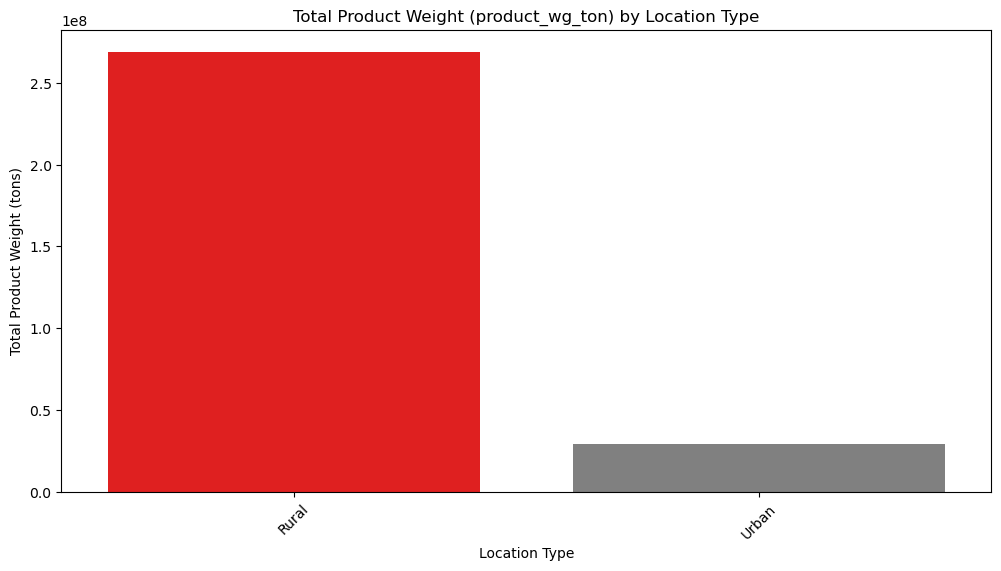

In [35]:
# Calculate the sum of product_wg_ton for each Location_type
location_type_totals = df.groupby('Location_type')['product_wg_ton'].sum().reset_index()

# Find the Location_type with the highest sum of product_wg_ton
max_total_location_type = location_type_totals.loc[location_type_totals['product_wg_ton'].idxmax(), 'Location_type']

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if location == max_total_location_type else 'grey' for location in location_type_totals['Location_type']]

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Location_type', y='product_wg_ton', data=location_type_totals, palette=colors)
plt.title('Total Product Weight (product_wg_ton) by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Product Weight (tons)')
plt.xticks(rotation=45)
plt.show()

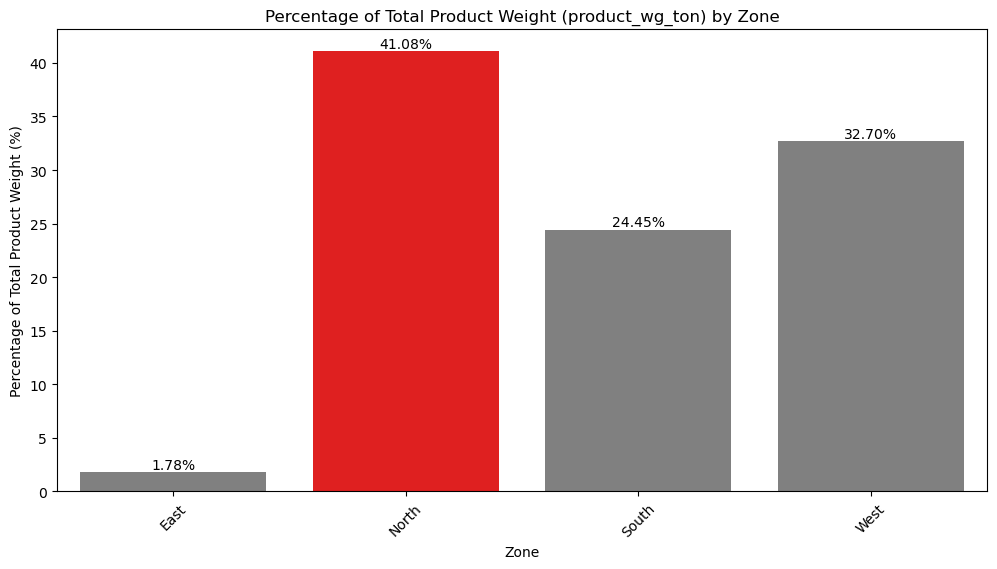

In [36]:
# Calculate the sum of product_wg_ton for each zone
zone_totals = df.groupby('zone')['product_wg_ton'].sum().reset_index()

# Find the zone with the highest sum of product_wg_ton
max_total_zone = zone_totals.loc[zone_totals['product_wg_ton'].idxmax(), 'zone']

# Calculate the total sum of product_wg_ton
total_product_wg_ton = zone_totals['product_wg_ton'].sum()

# Calculate the percentage of product_wg_ton for each zone
zone_totals['percentage'] = (zone_totals['product_wg_ton'] / total_product_wg_ton) * 100

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if zone == max_total_zone else 'grey' for zone in zone_totals['zone']]

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='zone', y='percentage', data=zone_totals, palette=colors)
plt.title('Percentage of Total Product Weight (product_wg_ton) by Zone')
plt.xlabel('Zone')
plt.ylabel('Percentage of Total Product Weight (%)')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

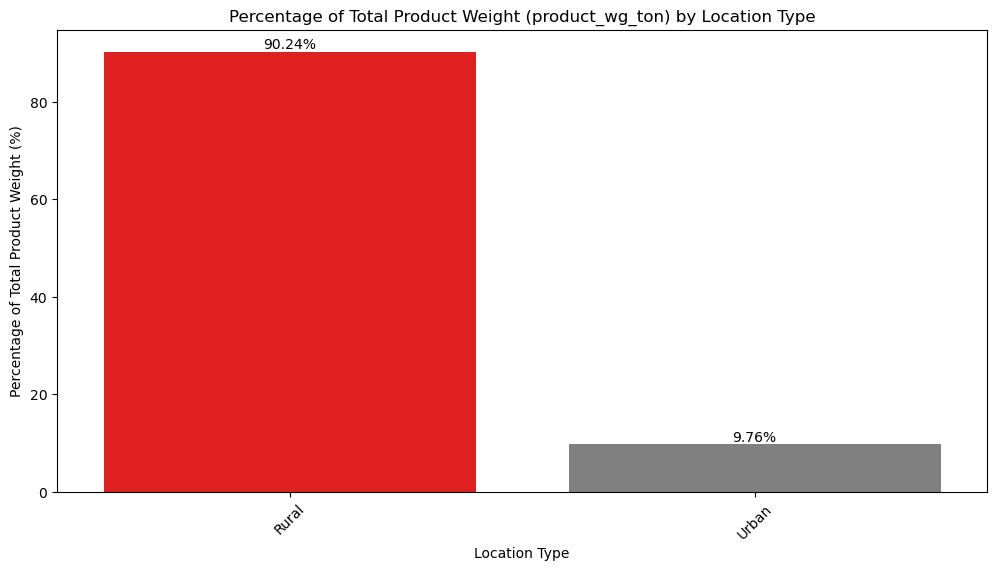

In [37]:
# Calculate the sum of product_wg_ton for each Location_type
location_type_totals = df.groupby('Location_type')['product_wg_ton'].sum().reset_index()

# Calculate the percentage of product_wg_ton for each Location_type relative to the total
location_type_totals['percentage'] = (location_type_totals['product_wg_ton'] / location_type_totals['product_wg_ton'].sum()) * 100

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if location == location_type_totals.loc[location_type_totals['percentage'].idxmax(), 'Location_type'] else 'grey' for location in location_type_totals['Location_type']]

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Location_type', y='percentage', data=location_type_totals, palette=colors)
plt.title('Percentage of Total Product Weight (product_wg_ton) by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Percentage of Total Product Weight (%)')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


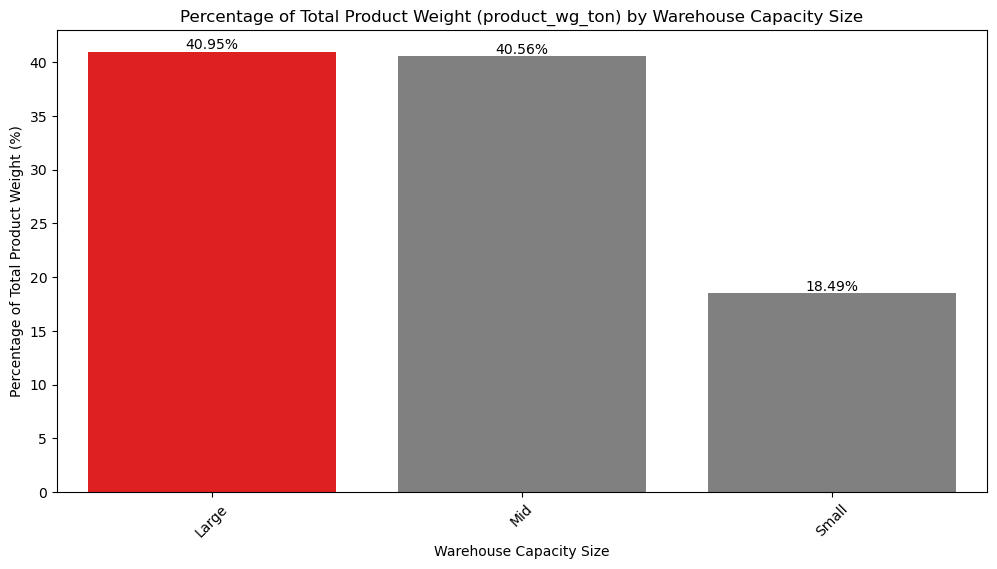

In [38]:
# Calculate the sum of product_wg_ton for each WH_capacity_size
wh_capacity_size_totals = df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index()

# Calculate the percentage of product_wg_ton for each WH_capacity_size relative to the total
wh_capacity_size_totals['percentage'] = (wh_capacity_size_totals['product_wg_ton'] / wh_capacity_size_totals['product_wg_ton'].sum()) * 100

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if capacity == wh_capacity_size_totals.loc[wh_capacity_size_totals['percentage'].idxmax(), 'WH_capacity_size'] else 'grey' for capacity in wh_capacity_size_totals['WH_capacity_size']]

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='WH_capacity_size', y='percentage', data=wh_capacity_size_totals, palette=colors)
plt.title('Percentage of Total Product Weight (product_wg_ton) by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Percentage of Total Product Weight (%)')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


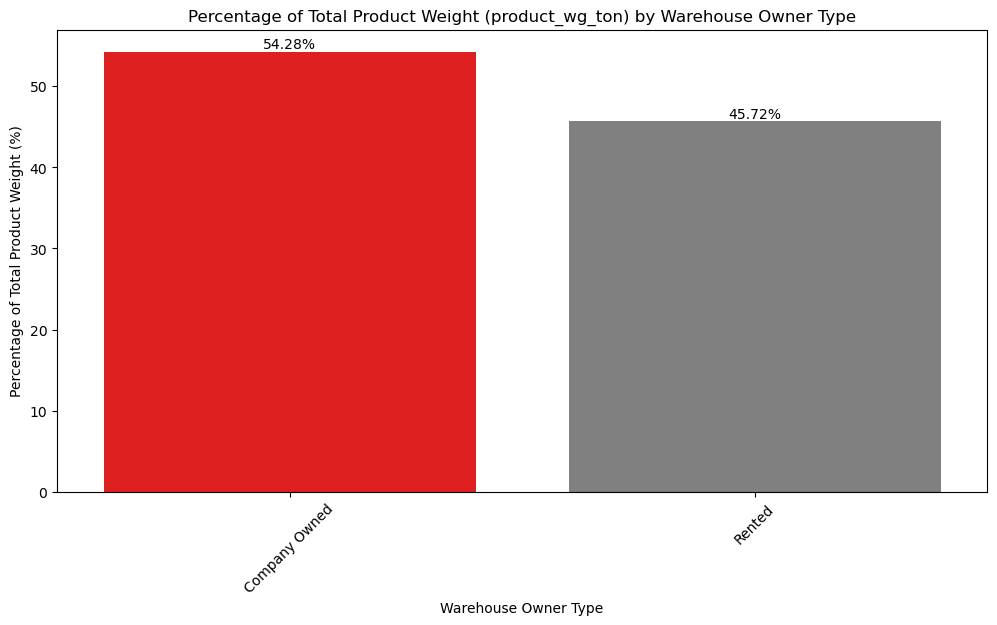

In [39]:
# Calculate the sum of product_wg_ton for each wh_owner_type
wh_owner_type_totals = df.groupby('wh_owner_type')['product_wg_ton'].sum().reset_index()

# Calculate the percentage of product_wg_ton for each wh_owner_type relative to the total
wh_owner_type_totals['percentage'] = (wh_owner_type_totals['product_wg_ton'] / wh_owner_type_totals['product_wg_ton'].sum()) * 100

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if owner_type == wh_owner_type_totals.loc[wh_owner_type_totals['percentage'].idxmax(), 'wh_owner_type'] else 'grey' for owner_type in wh_owner_type_totals['wh_owner_type']]

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='wh_owner_type', y='percentage', data=wh_owner_type_totals, palette=colors)
plt.title('Percentage of Total Product Weight (product_wg_ton) by Warehouse Owner Type')
plt.xlabel('Warehouse Owner Type')
plt.ylabel('Percentage of Total Product Weight (%)')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


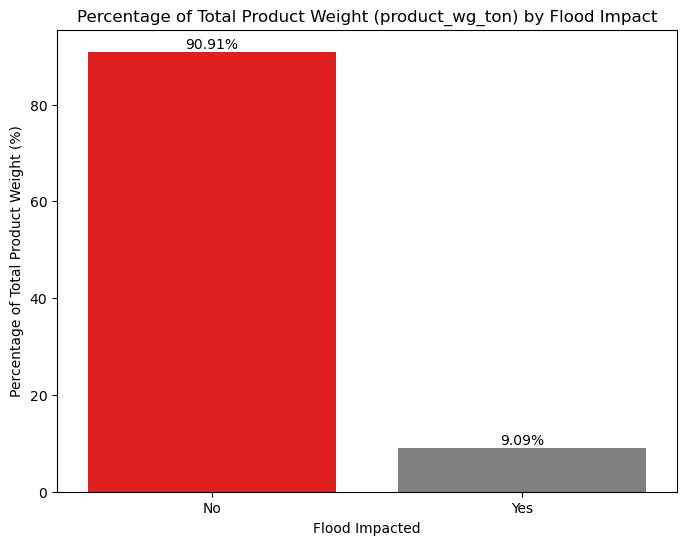

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 0 with 'No' and 1 with 'Yes' in the 'flood_impacted' column
df['flood_impacted'] = df['flood_impacted'].map({0: 'No', 1: 'Yes'})

# Calculate the sum of product_wg_ton for each flood_impacted category
flood_impacted_totals = df.groupby('flood_impacted')['product_wg_ton'].sum().reset_index()

# Calculate the percentage of product_wg_ton for each flood_impacted category relative to the total
total_product_wg_ton = flood_impacted_totals['product_wg_ton'].sum()
flood_impacted_totals['percentage'] = (flood_impacted_totals['product_wg_ton'] / total_product_wg_ton) * 100

# Find the flood_impacted category with the highest sum of product_wg_ton
max_total_flood_impacted = flood_impacted_totals.loc[flood_impacted_totals['product_wg_ton'].idxmax(), 'flood_impacted']

# Create a list of colors to highlight the highest sum in red and others in grey
colors = ['red' if impact == max_total_flood_impacted else 'grey' for impact in flood_impacted_totals['flood_impacted']]

# Create the barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='flood_impacted', y='percentage', data=flood_impacted_totals, palette=colors)
plt.title('Percentage of Total Product Weight (product_wg_ton) by Flood Impact')
plt.xlabel('Flood Impacted')
plt.ylabel('Percentage of Total Product Weight (%)')

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

# Replace x-axis labels
ax.set_xticklabels(['No', 'Yes'])

plt.show()


# Feature engineering

In [41]:
#Warehouse Age:
df['warehouse_age'] = 2023 - df['wh_est_year']  # Assuming the current year is 2023

In [42]:
#Total Incidents:
df['total_incidents'] = df['transport_issue_l1y'] + df['storage_issue_reported_l3m'] + df['wh_breakdown_l3m']


In [43]:
#Shops per Distributor:
df['shops_per_distributor'] = df['retail_shop_num'] / df['distributor_num'].replace(0, 1)  # To avoid division by zero


In [44]:
print(df[['approved_wh_govt_certificate', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m']].dtypes)


approved_wh_govt_certificate    object
storage_issue_reported_l3m       int64
wh_breakdown_l3m                 int64
govt_check_l3m                   int64
dtype: object


In [45]:
df.head(100)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,total_incidents,shops_per_distributor
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,Yes,0,1,112,25.0,2009.0,18,0,C,6,24,24071,14.0,25,112.857143
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,No,0,1,152,35.0,2009.0,23,1,A+,3,3,32134,14.0,26,136.567568
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,No,0,1,77,27.0,2010.0,24,0,B,3,6,30142,13.0,27,117.078947
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,No,0,1,124,22.0,2013.0,13,1,A+,5,2,18082,10.0,19,128.119048
10,WH_100010,EID_50010,Rural,Large,North,Zone 6,7,1,3,4623,Company Owned,31,No,0,1,150,37.0,1999.0,17,0,B+,4,6,21125,24.0,22,149.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,WH_100201,EID_50201,Rural,Mid,West,Zone 3,5,4,4,6060,Rented,66,No,0,1,141,39.0,2000.0,25,0,B,6,19,29116,23.0,35,91.818182
202,WH_100202,EID_50202,Rural,Large,North,Zone 5,8,0,3,4796,Rented,30,No,0,1,86,33.0,2016.0,12,0,A,1,5,16130,7.0,13,159.866667
203,WH_100203,EID_50203,Rural,Large,North,Zone 6,6,1,2,4485,Company Owned,23,No,0,1,157,29.0,2020.0,5,0,A,2,29,7113,3.0,8,195.000000
206,WH_100206,EID_50206,Rural,Small,South,Zone 6,5,0,2,6765,Company Owned,62,No,0,1,157,32.0,2018.0,11,0,A,2,2,15069,5.0,13,109.112903


In [46]:
# Convert both columns to strings and concatenate them
df['safety_index'] = df['approved_wh_govt_certificate'].astype(str) + '_' + df['total_incidents'].astype(str)


In [47]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,total_incidents,shops_per_distributor,safety_index
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,Yes,0,1,112,25.0,2009.0,18,0,C,6,24,24071,14.0,25,112.857143,C_25
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,No,0,1,152,35.0,2009.0,23,1,A+,3,3,32134,14.0,26,136.567568,A+_26
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,No,0,1,77,27.0,2010.0,24,0,B,3,6,30142,13.0,27,117.078947,B_27
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,No,0,1,124,22.0,2013.0,13,1,A+,5,2,18082,10.0,19,128.119048,A+_19
10,WH_100010,EID_50010,Rural,Large,North,Zone 6,7,1,3,4623,Company Owned,31,No,0,1,150,37.0,1999.0,17,0,B+,4,6,21125,24.0,22,149.129032,B+_22


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12127 entries, 4 to 24999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 12127 non-null  object 
 1   WH_Manager_ID                 12127 non-null  object 
 2   Location_type                 12127 non-null  object 
 3   WH_capacity_size              12127 non-null  object 
 4   zone                          12127 non-null  object 
 5   WH_regional_zone              12127 non-null  object 
 6   num_refill_req_l3m            12127 non-null  int64  
 7   transport_issue_l1y           12127 non-null  int64  
 8   Competitor_in_mkt             12127 non-null  int64  
 9   retail_shop_num               12127 non-null  int64  
 10  wh_owner_type                 12127 non-null  object 
 11  distributor_num               12127 non-null  int64  
 12  flood_impacted                12127 non-null  object 
 13  f

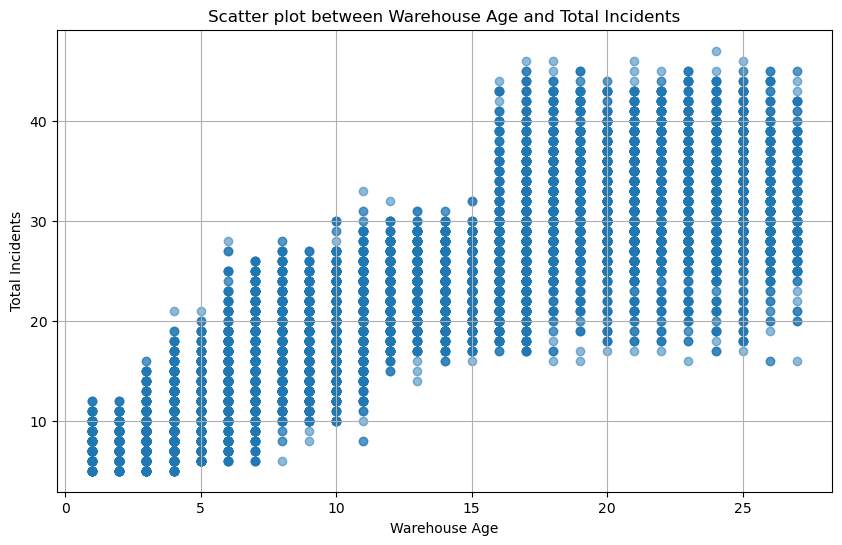

In [49]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['warehouse_age'], df['total_incidents'], alpha=0.5)
plt.title('Scatter plot between Warehouse Age and Total Incidents')
plt.xlabel('Warehouse Age')
plt.ylabel('Total Incidents')
plt.grid(True)
plt.show()


In [50]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [51]:
shapiro_stat, shapiro_p = shapiro(df['total_incidents'])

print(f"Shapiro-Wilk Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p}")

alpha = 0.05
if shapiro_p > alpha:
    print("Fail to reject the null hypothesis. Data appears to be normally distributed.")
else:
    print("Reject the null hypothesis. Data is not normally distributed.")

NameError: name 'shapiro' is not defined

In [54]:
import numpy as np
from scipy.stats import ttest_ind

# Splitting data into older and latest based on median age.
median_age = np.median(df['warehouse_age'])
older_warehouses = df[df['warehouse_age'] > median_age]['total_incidents']
latest_warehouses = df[df['warehouse_age'] <= median_age]['total_incidents']

# Performing t-test
t_stat, p_val = ttest_ind(older_warehouses, latest_warehouses)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Deciding based on p-value
alpha = 0.05  # significance level
if p_val < alpha:
    print("We reject the null hypothesis and accept that the means of total incidents for older and newer warehouses are different.")
else:
    print("We fail to reject the null hypothesis. There's no significant difference in the means of total incidents between older and newer warehouses.")


T-statistic: 122.77891671059537
P-value: 0.0
We reject the null hypothesis and accept that the means of total incidents for older and newer warehouses are different.


In [55]:
from scipy.stats import spearmanr

# Calculate Spearman's Rank Correlation Coefficient
coef, p_val = spearmanr(df['warehouse_age'], df['total_incidents'])

print(f"Spearman's Rank Correlation Coefficient: {coef:.3f}")
print(f"P-value: {p_val:.3f}")

# Deciding based on p-value
alpha = 0.05
if p_val < alpha:
    if coef > 0:
        print("Reject the null hypothesis. There's a positive monotonic relationship between warehouse age and total incidents.")
    else:
        print("Reject the null hypothesis. There's a negative monotonic relationship between warehouse age and total incidents.")
else:
    print("Fail to reject the null hypothesis. There's no significant monotonic relationship between warehouse age and total incidents.")

Spearman's Rank Correlation Coefficient: 0.856
P-value: 0.000
Reject the null hypothesis. There's a positive monotonic relationship between warehouse age and total incidents.


In [56]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [57]:
import statsmodels.api as sm

# Assuming 'warehouse_age' is the column that represents the age of the warehouses.
X = df['warehouse_age']
y = df['total_incidents']

# Add a constant to the model (i.e., bias or intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        total_incidents   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                 2.989e+04
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:56:26   Log-Likelihood:                -36796.
No. Observations:               12127   AIC:                         7.360e+04
Df Residuals:                   12125   BIC:                         7.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.7725      0.100     77.907

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Splitting the data
X = df[['warehouse_age']]
y = df['total_incidents']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Training the model and making predictions
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# 3. Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 24.64
Mean Absolute Error: 3.87
R-squared: 0.72


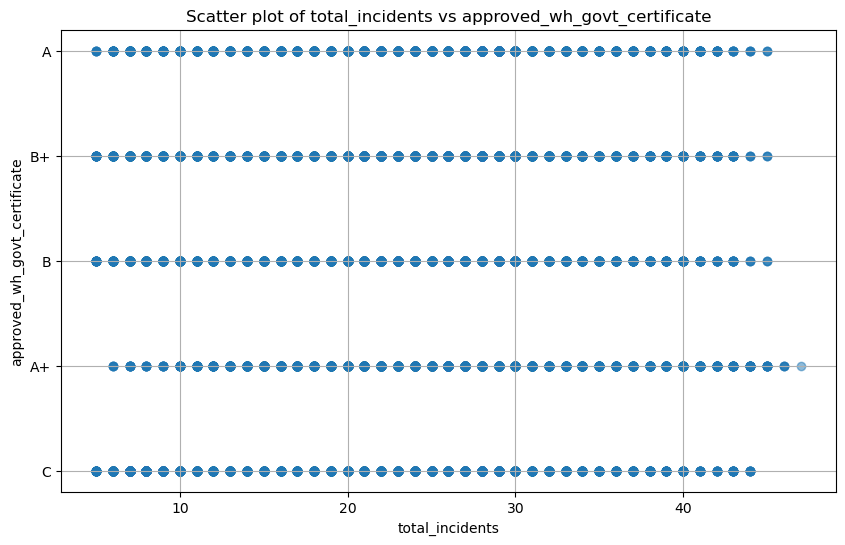

In [52]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_incidents'], df['approved_wh_govt_certificate'], alpha=0.5)
plt.title('Scatter plot of total_incidents vs approved_wh_govt_certificate')
plt.xlabel('total_incidents')
plt.ylabel('approved_wh_govt_certificate')
plt.grid(True)
plt.show()


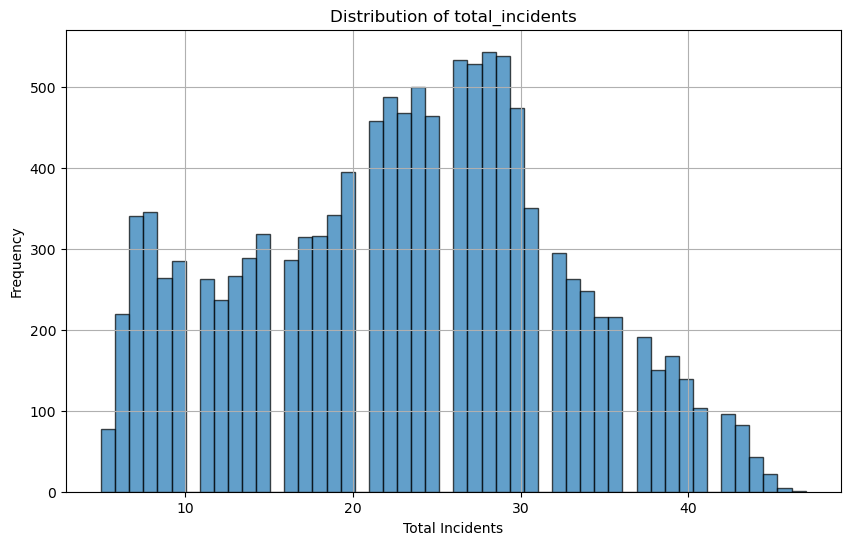

In [53]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['total_incidents'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of total_incidents')
plt.xlabel('Total Incidents')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
